# Parser

## Homework #11 by Glaktionova Natalia

Top 100 Language Learning Youtube Channels for Language Learners & Polyglots

In [23]:
import requests  
from bs4 import BeautifulSoup
import pandas as pd   
import time  

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
page_link = 'https://blog.feedspot.com/language_learning_youtube_channels/'

In [4]:
response = requests.get(page_link)
response

<Response [200]>

In [5]:
html = response.content

In [6]:
soup = BeautifulSoup(html,'html.parser')                                  

In [7]:
df = pd.DataFrame()

In [8]:
names = soup.findAll('a', attrs = {'class':'tlink'})
names = [name.text for name in names]

In [9]:
df['Name'] = names

In [10]:
about = []
since = []
for strong_tag in soup.find_all('p', attrs = {'class':'trow trow-wrap'}):
    about.append(strong_tag.find('strong', text="About Youtuber").next_sibling.strip())
    since.append(strong_tag.find('strong', text="Since").next_sibling.strip())

In [11]:
freq = []
for strong_tag in soup.find_all('p', attrs = {'class':'trow trow-wrap'}):
    if strong_tag.find('strong', text="Frequency") is None:
        freq.append('')
    else:
        freq.append(strong_tag.find('strong', text="Frequency").next_sibling.strip())

In [12]:
df['About'] = about
df['Frequency'] = freq
df['Since'] = since

In [13]:
links = soup.find_all('a', attrs = {'class':'ext'})
links = [link.attrs['href'] for link in links]

In [14]:
df['Link'] = links

In [15]:
followers = []
views = []
videos = []
for info in soup.find_all('span', attrs = {'class':'follow'}):
    infos = info.next_sibling.next_sibling.next_sibling.text.split('.')
    followers.append(infos[0].split('- ')[1].strip().replace(',','')) 
    views.append(infos[1].split('- ')[1].strip().replace(',',''))
    videos.append(infos[2].split('- ')[1].strip().replace(',',''))

In [16]:
followers = list(map(lambda x:0 if x=="n/a" else int(x), followers))
views = list(map(lambda x:0 if x=="n/a" else int(x), views))
videos = list(map(lambda x:0 if x=="n/a" else int(x), videos))

In [17]:
df['Followers'] = followers
df['Views'] = views
df['Videos'] = videos

**Готовый датасет**

In [45]:
df.head(10)

,Name,About,Frequency,Since,Link,Followers,Views,Videos
0,Easy Languages,We are a non-profit project aiming to help peo...,1 video / day,Jul 2006,https://www.youtube.com/user/magauchsein/videos,828000,111638657,2352
1,Babbel,Babbel is the new way to learn a foreign langu...,1 video / month,Apr 2009,https://www.youtube.com/user/LessonNine/videos,167000,47060007,241
2,Sleep Learning,Welcome to our Sleep Learning YouTube channel....,2 videos / quarter,Nov 2011,https://www.youtube.com/channel/UC8hrVYljKmaDd...,468000,17407938,29
3,Steve Kaufmann - lingosteve,"If you're passionate about languages, you're i...",1 video / day,Jul 2007,https://www.youtube.com/user/lingosteve/videos,183000,17766345,1309
4,Benny Lewis,"I'm Benny the Irish Polyglot, and I make video...",3 videos / year,Oct 2006,https://www.youtube.com/user/irishpolyglot/videos,100000,11597357,289
5,Luca Lampariello,This channel is dedicated to my biggest passio...,1 video / week,May 2008,https://www.youtube.com/user/poliglotta80/videos,108000,7654915,168
6,laoshu505000,A program which helps the language learner bec...,2 videos / week,Oct 2006,https://www.youtube.com/user/laoshu505000/videos,953000,132876155,3006
7,Learn English with Emma,"Hi, my name is Emma, TESOL-certified and I'm g...",1 video / week,Dec 2011,https://www.youtube.com/user/EnglishTeacherEmm...,2830000,152161717,163
8,Learn Arabic with Maha,My name is Maha and I'm a language teacher. Th...,2 videos / week,Nov 2008,https://www.youtube.com/user/LearnArabicwithMa...,475000,62661804,467
9,Anglo-Link,"Our goal is to help you learn, improve and mas...",2 videos / quarter,Jul 2011,https://www.youtube.com/user/MinooAngloLink/vi...,1230000,90978049,99


Найдем каналы с самым большим количеством подписчиков

In [53]:
df.sort_values(by='Followers', ascending=False).head()

,Name,About,Frequency,Since,Link,Followers,Views,Videos
10,Learn English with EnglishClass101.com,EnglishClass101.com is an online English langu...,1 video / day,Mar 2007,https://www.youtube.com/user/ENGLISHCLASS101/v...,3670000,150896131,1139
11,English with Lucy,Learn beautiful British English for free on Yo...,1 video / week,Jan 2016,https://www.youtube.com/channel/UCz4tgANd4yy8O...,3560000,125797849,216
7,Learn English with Emma,"Hi, my name is Emma, TESOL-certified and I'm g...",1 video / week,Dec 2011,https://www.youtube.com/user/EnglishTeacherEmm...,2830000,152161717,163
12,BBC Learning English,Learn how to speak English with the BBC. Every...,1 video / day,Jun 2008,https://www.youtube.com/user/bbclearningenglis...,2550000,123129133,2190
92,Daily English Conversation,Daily English Conversation is a free Channel f...,4 videos / year,Oct 2014,https://www.youtube.com/channel/UCV1h_cBE0Drdx...,1970000,90418543,184


Посмотрим зависимость просмотров от количества подписчиков

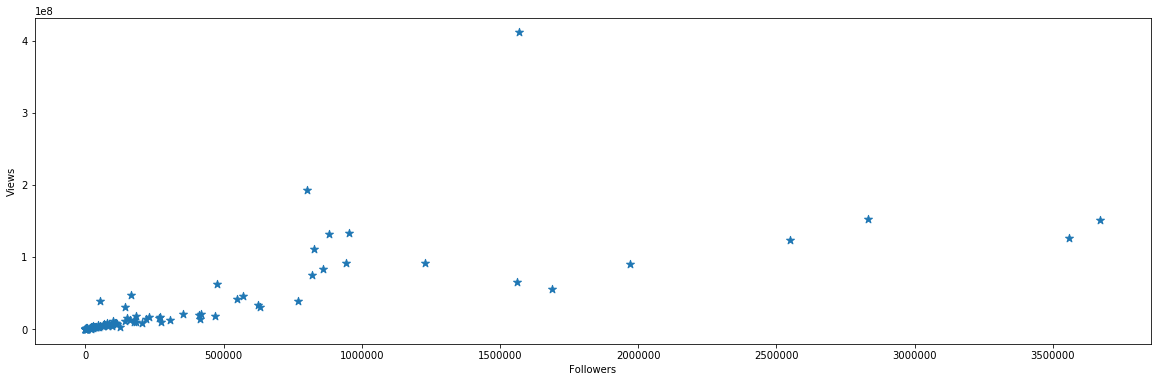

In [46]:
plt.figure(figsize=(20,6))
plt.scatter(x = df.Followers, y = df.Views, marker = '*',  s=70)
plt.xlabel("Followers")
plt.ylabel("Views")
plt.show();